In [22]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('DATA/advertising.csv')
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [25]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


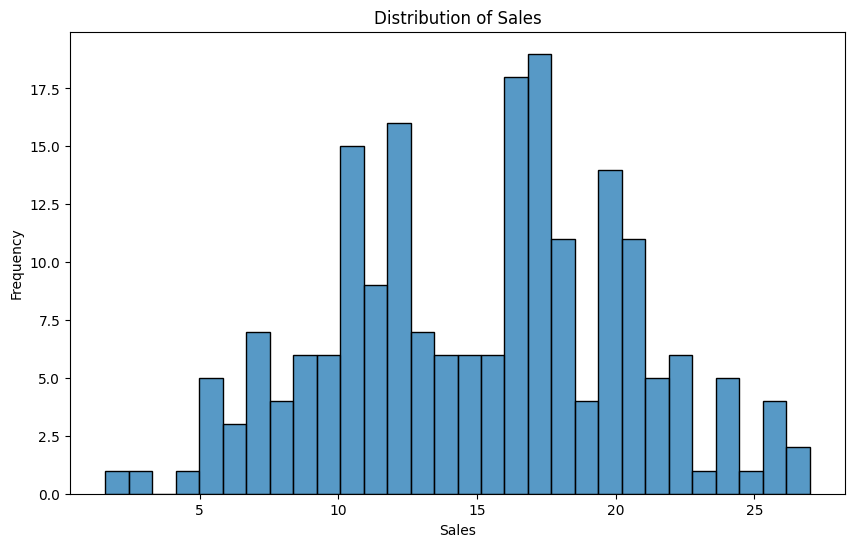

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

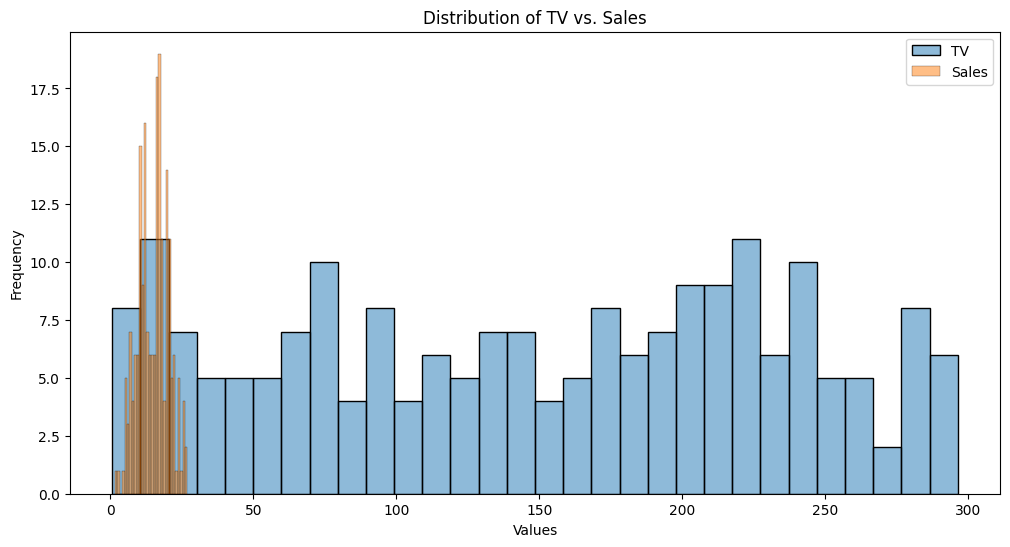

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TV'], bins=30, label='TV', alpha=0.5)  
sns.histplot(df['Sales'], bins=30, label='Sales', alpha=0.5)  
plt.title('Distribution of TV vs. Sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

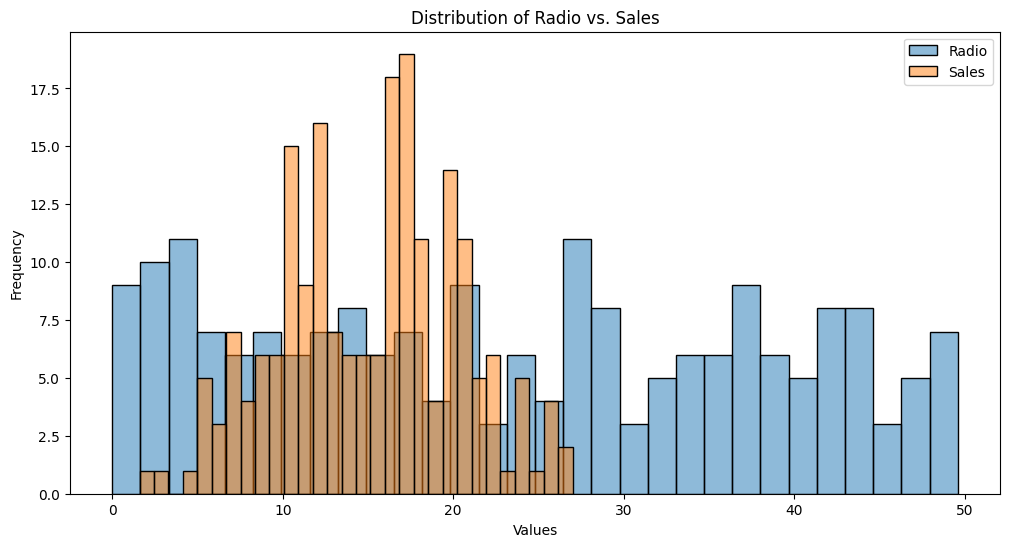

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Radio'], bins=30, label='Radio', alpha=0.5)  
sns.histplot(df['Sales'], bins=30, label='Sales', alpha=0.5)  
plt.title('Distribution of Radio vs. Sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

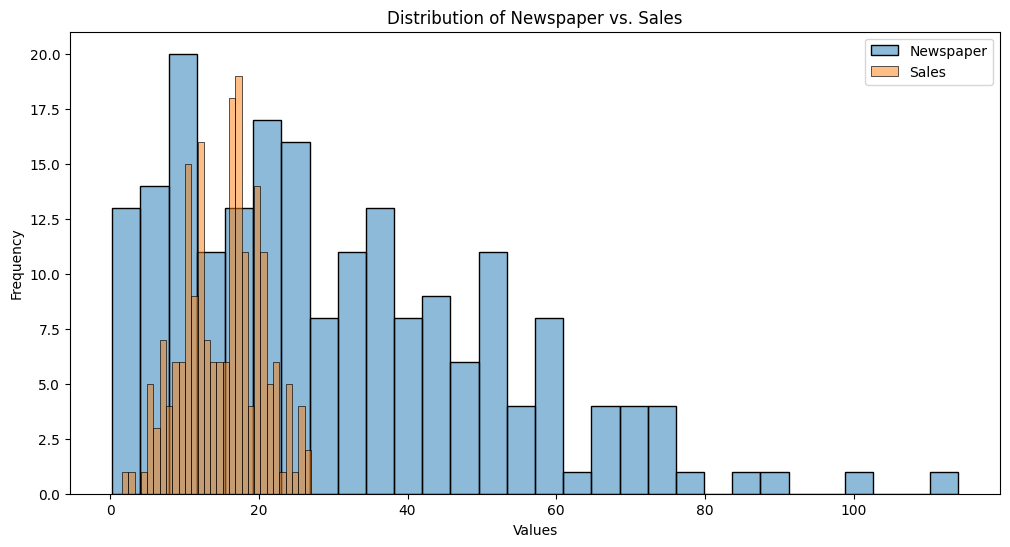

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Newspaper'], bins=30, label='Newspaper', alpha=0.5)  
sns.histplot(df['Sales'], bins=30, label='Sales', alpha=0.5)  
plt.title('Distribution of Newspaper vs. Sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

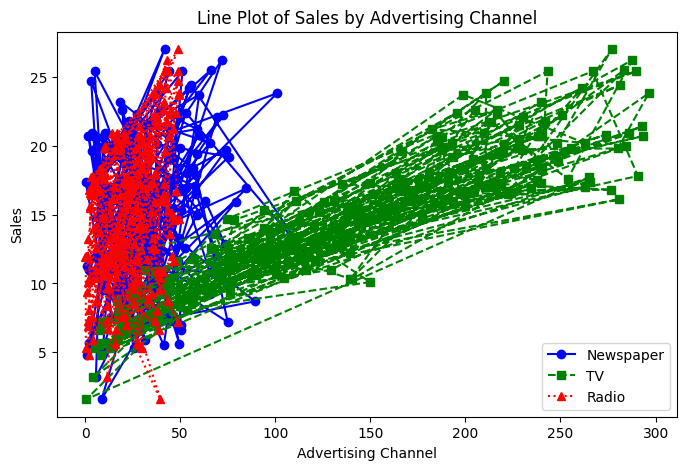

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(df['Newspaper'], df['Sales'], marker='o', linestyle='-', color='b', label='Newspaper')
plt.plot(df['TV'], df['Sales'], marker='s', linestyle='--', color='g', label='TV')
plt.plot(df['Radio'], df['Sales'], marker='^', linestyle=':', color='r', label='Radio') 

plt.title('Line Plot of Sales by Advertising Channel')
plt.xlabel('Advertising Channel')
plt.ylabel('Sales')
plt.legend() 
plt.show()

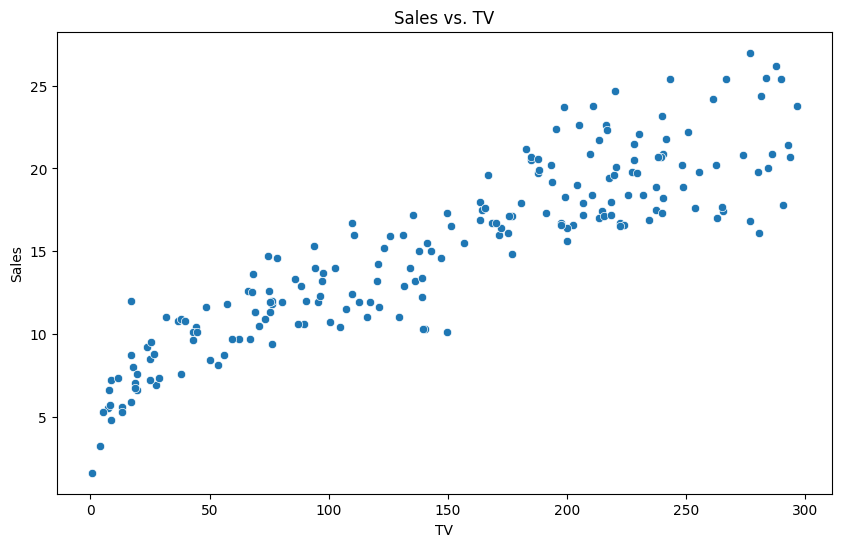

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs. TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

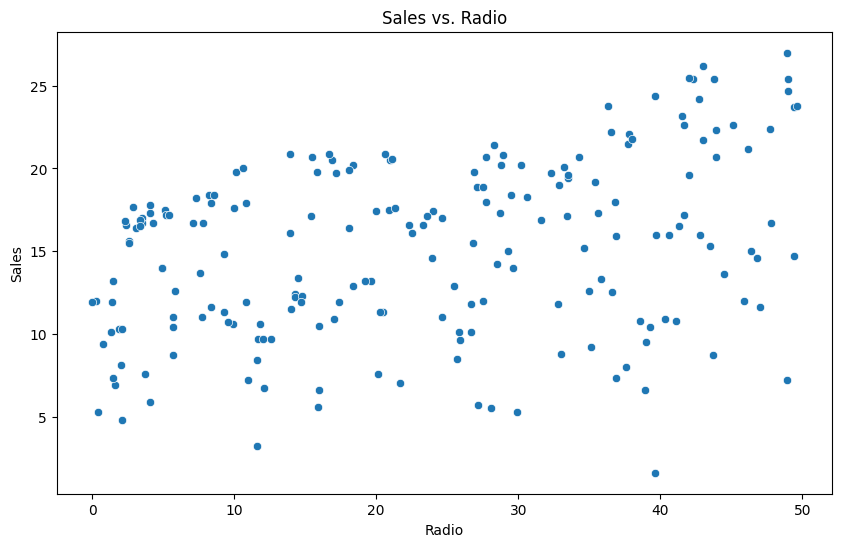

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs. Radio')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

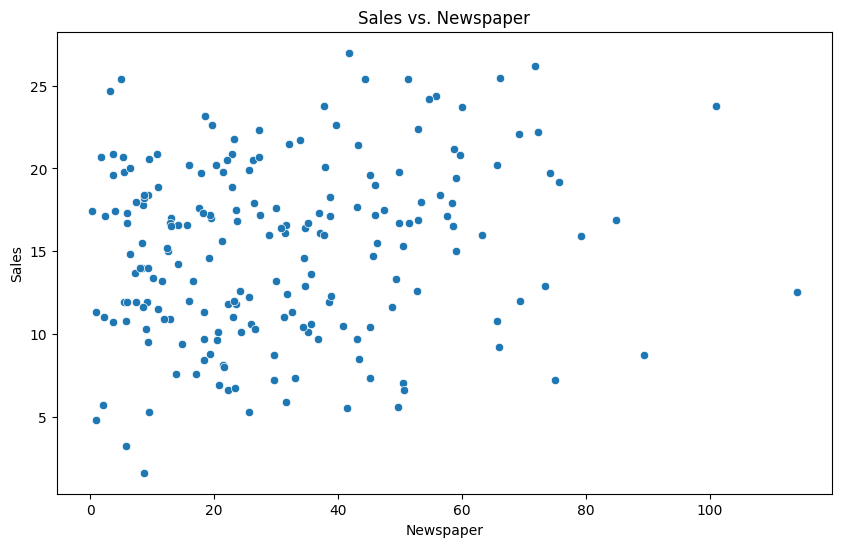

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales vs. Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

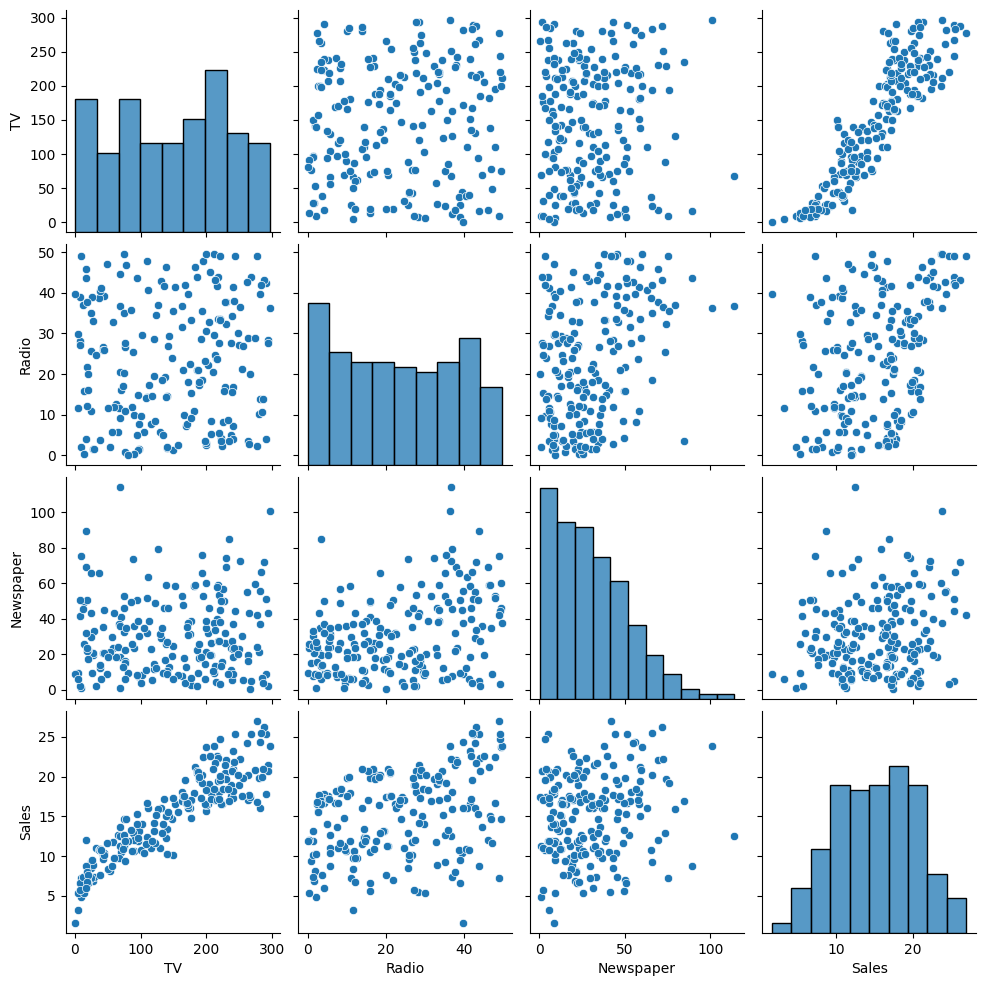

In [34]:
sns.pairplot(df)
plt.show()

In [35]:
df['TV_Radio_Interaction'] = df['TV'] * df['Radio']

In [36]:
X = df[['TV', 'Radio', 'Newspaper', 'TV_Radio_Interaction']]
y = df['Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean Squared Error: 2.3821575606242846
R-squared: 0.9229102666046101


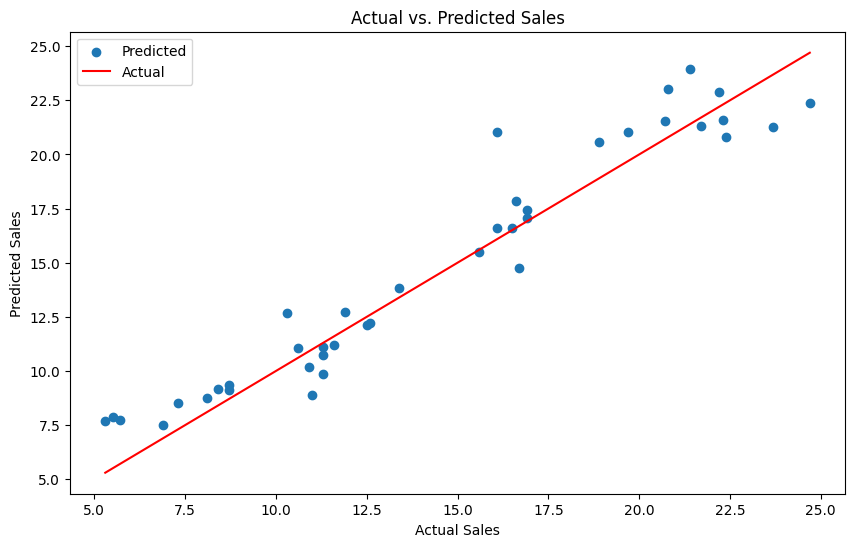

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend(['Predicted', 'Actual'])
plt.show()